## Import libraries

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

## Import the datasets

In [2]:
df_train = pd.read_csv('E:\\web_economics\\train.csv')
df_test = pd.read_csv('E:\\web_economics\\test.csv')
df_val = pd.read_csv('E:\\web_economics\\validation.csv')

In [3]:
df_test.domain.unique()

array(['trqRTuxJMT27gspy', '5F1RQS9rg5scFsf', '31xSTvprdN1RFt', ...,
       '9ca5460df7de5223bd881045d82c1af1', 'trqRTumJMvC41m58uG',
       'ef1fa9f5ad6ada39f1b042f1744217ba'], dtype=object)

### Get all the column info of training dataset

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697738 entries, 0 to 2697737
Data columns (total 26 columns):
click             int64
weekday           int64
hour              int64
bidid             object
logtype           int64
userid            object
useragent         object
IP                object
region            int64
city              int64
adexchange        object
domain            object
url               object
urlid             object
slotid            object
slotwidth         int64
slotheight        int64
slotvisibility    object
slotformat        object
slotprice         int64
creative          object
bidprice          int64
payprice          int64
keypage           object
advertiser        int64
usertag           object
dtypes: int64(12), object(14)
memory usage: 535.1+ MB


### example of data in training dataset

In [5]:
df_train.iloc[0]

click                                            0
weekday                                          1
hour                                            14
bidid             fdfae6789b787899f1b875de3ab8b21a
logtype                                          1
userid                           u_Vh1OPkFv3q5CFdR
useragent                               windows_ie
IP                                   180.107.112.*
region                                          80
city                                            85
adexchange                                       2
domain                        trqRTuToMTNUjM9r5rMi
url               d48a96ab59d7ad741a48e781de44efeb
urlid                                         null
slotid                                   433287550
slotwidth                                      468
slotheight                                      60
slotvisibility                                   1
slotformat                                       0
slotprice                      

### calculate basic statistics

In [6]:
adv = df_train.advertiser.unique()
adv
table = pd.DataFrame(columns=['adv', 'costs', 'clicks', 'imps', 'conversion', 'CTR', 'CVR', 'avg_CPM', 'eCPC'])
for i in range(len(adv)):
    ad = adv[i]
    df = df_train[df_train.advertiser == ad]
    clicks = df.click.sum()
    imps = df.bidid.count()
    costs = df.payprice.sum() / 1000
    conversion = df['logtype'][df.logtype == 3].count()
    CTR = ((clicks / imps) * 100)
    CVR = ((conversion / imps) * 100)
    avg_CPM = ((costs / imps) * 1000)
    eCPC = (costs / clicks)
    table.loc[i] = [ad, costs, clicks, imps, conversion, CTR, CVR, avg_CPM, eCPC]
table

,adv,costs,clicks,imps,conversion,CTR,CVR,avg_CPM,eCPC
0,1458.0,37231.239,451.0,540293.0,0.0,0.083473,0.0,68.909349,82.552636
1,3476.0,27481.402,175.0,346778.0,0.0,0.050465,0.0,79.247824,157.036583
2,3427.0,36820.111,340.0,454031.0,0.0,0.074885,0.0,81.096029,108.294444
3,3358.0,28145.288,233.0,304782.0,0.0,0.076448,0.0,92.345637,120.795227
4,2259.0,13649.026,45.0,146778.0,0.0,0.030659,0.0,92.990952,303.311689
5,2821.0,20625.766,144.0,231416.0,0.0,0.062226,0.0,89.128522,143.234486
6,3386.0,38341.028,358.0,498554.0,0.0,0.071808,0.0,76.904464,107.097844
7,2997.0,3413.227,251.0,54487.0,0.0,0.460660,0.0,62.642961,13.598514
8,2261.0,10789.152,37.0,120619.0,0.0,0.030675,0.0,89.448196,291.598703


### Plotting several CTR related chart (user feedback)

In [7]:
advs = [1458, 3427]

### Weekday

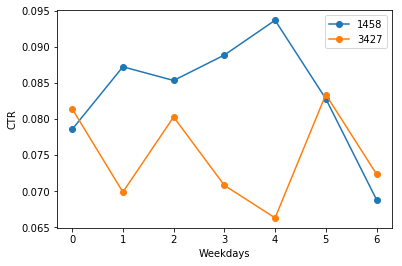

In [8]:
dataframes = []
for adv in advs:
    df = df_train[df_train['advertiser'] == adv]
    ctr = df.groupby('weekday').agg({'click':{'click':sum}, 'bidid': {'imps' : 'count'}})
    ctr.columns = ctr.columns.droplevel(0)
    ctr['ctr'] = (ctr.click / ctr.imps) * 100
    dataframes.append(ctr)

plt.plot(dataframes[0]['ctr'], label=str(advs[0]), marker='o')
plt.plot(dataframes[1]['ctr'], label=str(advs[1]), marker='o')
plt.ylabel('CTR')
plt.xlabel('Weekdays')
plt.margins(0.05)
plt.legend()
plt.show()

### Hours

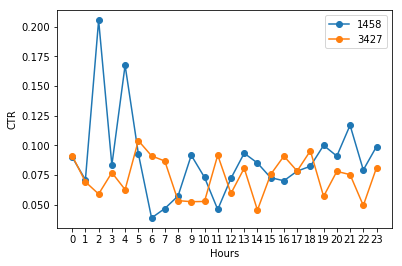

In [9]:
dataframes = []
for adv in advs:
    df = df_train[df_train['advertiser'] == adv]
    ctr = df.groupby('hour').agg({'click':{'click':sum}, 'bidid': {'imps' : 'count'}})
    ctr.columns = ctr.columns.droplevel(0)
    ctr['ctr'] = (ctr.click / ctr.imps) * 100
    dataframes.append(ctr)

plt.plot(dataframes[0]['ctr'], label=str(advs[0]), marker='o')
plt.plot(dataframes[1]['ctr'], label=str(advs[1]), marker='o')
plt.ylabel('CTR')
plt.xlabel('Hours')
plt.xticks(df.hour.unique())
plt.margins(0.05)
plt.legend()
plt.show()

### OS

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


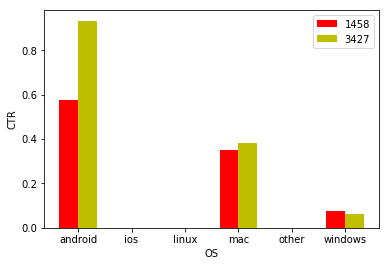

In [10]:
dataframes = []
df = None
for adv in advs:
    df = df_train[df_train['advertiser'] == adv]
    os = list(df.useragent)
    os = [x.split('_')[0] for x in os]
    df['os'] = os
    ctr = df.groupby('os').agg({'click':{'click':sum}, 'bidid': {'imps' : 'count'}})
    ctr.columns = ctr.columns.droplevel(0)
    ctr['ctr'] = (ctr.click / ctr.imps) * 100
    dataframes.append(ctr)

all_os = list(df.os.unique())
all_os.sort()
x = np.arange(len(all_os))
width = 0.35

plt.bar(x, dataframes[0]['ctr'], width=width, color='r', label=str(advs[0]))
plt.bar(x + width, dataframes[1]['ctr'], width=width, color='y', label=str(advs[1]))
plt.ylabel('CTR')
plt.xlabel('OS')
plt.xticks(x + width / 2, all_os)
plt.margins(x=0.05)
plt.legend()
plt.show()

### Browsers

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


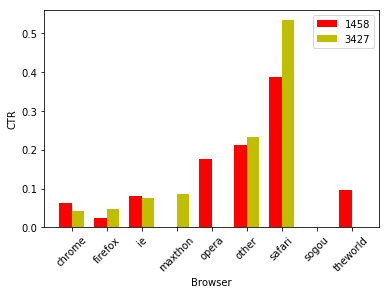

In [11]:
dataframes = []
df = None
for adv in advs:
    df = df_train[df_train['advertiser'] == adv]
    browser = list(df.useragent)
    browser = [x.split('_')[1] for x in browser]
    df['browser'] = browser
    ctr = df.groupby('browser').agg({'click':{'click':sum}, 'bidid': {'imps' : 'count'}})
    ctr.columns = ctr.columns.droplevel(0)
    ctr['ctr'] = (ctr.click / ctr.imps) * 100
    dataframes.append(ctr)

all_browser = list(df.browser.unique())
all_browser.sort()
x = np.arange(len(all_browser))
width = 0.35

plt.bar(x, dataframes[0]['ctr'], width=width, color='r', label=str(advs[0]))
plt.bar(x + width, dataframes[1]['ctr'], width=width, color='y', label=str(advs[1]))
plt.ylabel('CTR')
plt.xlabel('Browser')
plt.xticks(x + width / 2, all_browser, rotation=45)
plt.margins(x=0.05)
plt.legend()
plt.show()

### Regions

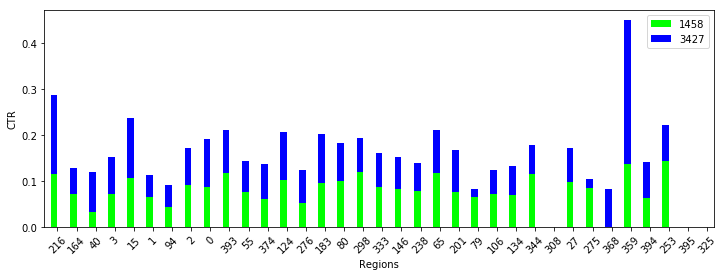

In [12]:
dataframes = []
df = None
for adv in advs:
    df = df_train[df_train['advertiser'] == adv]
    ctr = df.groupby('region').agg({'click':{'click':sum}, 'bidid': {'imps' : 'count'}})
    ctr.columns = ctr.columns.droplevel(0)
    ctr['ctr'] = (ctr.click / ctr.imps) * 100
    dataframes.append(ctr)
    
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
x = np.arange(len(df.region.unique()))
width = 0.35

p1 = ax.bar(x, dataframes[0]['ctr'], width, color=(0, 1, 0), label=str(advs[0]))
p2 = ax.bar(x, dataframes[1]['ctr'], width, color=(0, 0, 1), bottom=dataframes[0]['ctr'], label=str(advs[1]))
ax.set_xlabel('Regions')
ax.set_ylabel('CTR')
ax.margins(x=0.01)
ax.set_xticks(x + width/2.)
ax.legend()
l = list(df.region.unique())
l.sort
ax.set_xticklabels(l, rotation=45)

plt.show()

### Adexchange

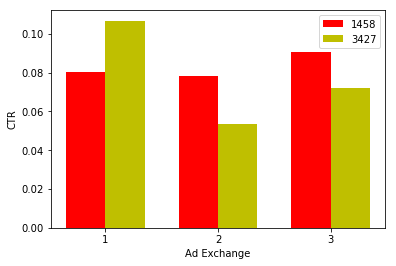

In [13]:
dataframes = []
df = None
for adv in advs:
    df = df_train[df_train['advertiser'] == adv]
    ctr = df.groupby('adexchange').agg({'click':{'click':sum}, 'bidid': {'imps' : 'count'}})
    ctr.columns = ctr.columns.droplevel(0)
    ctr['ctr'] = (ctr.click / ctr.imps) * 100
    dataframes.append(ctr)

all_adexchange = list(df.adexchange.unique())
all_adexchange.sort()
x = np.arange(len(all_adexchange))
width = 0.35
    
plt.bar(x, dataframes[0]['ctr'], width=width, color='r', label=str(advs[0]))
plt.bar(x + width, dataframes[1]['ctr'], width=width, color='y', label=str(advs[1]))
plt.ylabel('CTR')
plt.xlabel('Ad Exchange')
plt.xticks(x + width/2., ['1','2','3'])
plt.margins(x=0.05)
plt.legend()
plt.show()

### SLotsize

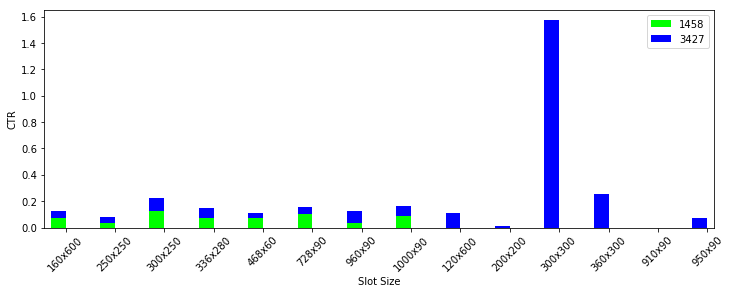

In [15]:
dataframes = []
df = None
for adv in advs:
    df = df_train[df_train['advertiser'] == adv]
    ctr = df.groupby(('slotwidth','slotheight'), as_index=False).agg({'click':{'click':sum}, 'bidid': {'imps' : 'count'}})
    ctr.columns = ctr.columns.droplevel(0)
    ctr['ctr'] = (ctr.click / ctr.imps) * 100
    ctr.columns = ['slotwidth','slotheight','imps','click','ctr']
    dataframes.append(ctr)

new_df = pd.merge(dataframes[0], dataframes[1], how='outer', on=['slotwidth','slotheight'])
new_df = new_df.fillna(0)

labels = list(new_df[['slotwidth','slotheight']].values)
labels_str = [str(l[0]) + 'x' + str(l[1]) for l in labels]
labels_str

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
x = np.arange(len(new_df.slotwidth))
width = 0.3

p1 = ax.bar(x, new_df['ctr_x'], width, color=(0, 1, 0), label=advs[0])
p2 = ax.bar(x, new_df['ctr_y'], width, color=(0, 0, 1), bottom=new_df['ctr_x'], label=advs[1])
ax.set_xlabel('Slot Size')
ax.set_ylabel('CTR')
ax.margins(x=0.01)
ax.set_xticks(x + width/2.)
ax.legend()
ax.set_xticklabels(labels_str, rotation=45)

plt.show()
